In [3]:
import numpy as np
import pandas as pd
import json
import requests
import time

In [87]:
# progress bar

import time, sys
from IPython.display import clear_output

def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [13]:
key_file = open('./GoogleKey.txt')
API_KEY = key_file.readline()

In [39]:
# Twitter Dataset
twitter_df = pd.read_csv('data/train_E6oV3lV.csv')
len(twitter_df)

31962

In [100]:
import numpy as np
import pandas as pd
import os  
import sys

import os.path
from pprint import pprint
import time
from io import BytesIO

from random import random
import uuid





PATH = 'data/HateSpeechDataset/'
TRAIN = 'sampled_train/'
TEST = 'sampled_test/'
ALL ='all_files/'


keys = pd.read_csv(PATH + 'annotations_metadata.csv')
keys.head()

all_list = []
for filename in os.listdir(PATH + ALL):
    with open(PATH + ALL + filename) as inp:
        data = list(inp)
        no_ext = filename.rsplit( ".", 1 )[ 0 ] 
        all_list.append([no_ext, data[0]]) 

train_list = []
for filename in os.listdir(PATH + TRAIN):
    with open(PATH + TRAIN + filename) as inp:
        data = list(inp)
        no_ext = filename.rsplit( ".", 1 )[ 0 ] 
        train_list.append([no_ext, data[0]])
        
test_list = []
for filename in os.listdir(PATH + TEST):
    with open(PATH + TEST + filename) as inp:
        no_ext = filename.rsplit( ".", 1 )[ 0 ] 
        data = list(inp)
        test_list.append([no_ext, data[0]])

train = pd.DataFrame(train_list, columns = ['id','examples'])
test = pd.DataFrame(test_list, columns = ['id','examples'])
all_files = pd.DataFrame(all_list, columns = ['id','examples'])

train = pd.merge(train, keys, how='left', left_on='id', right_on='file_id')
train.drop(columns=['file_id'])
test = pd.merge(test, keys, how='left', left_on='id', right_on='file_id')
test.drop(columns=['file_id'])
all_files = pd.merge(all_files, keys, how='left', left_on='id', right_on='file_id')
all_files.drop(columns=['file_id']) 

,id,examples,user_id,subforum_id,num_contexts,label
0,13458115_2,It 's like that at most public boards .,572266,1347,0,noHate
1,13367480_1,I wonder if one of the victims opened the door...,572710,1345,0,noHate
2,30422449_1,Some people believe the Jack O ' Lantern also ...,576917,1348,0,noHate
3,14651837_4,Ready .... GO !!!,572043,1371,0,noHate
4,30527903_3,Thanks !,573458,1359,0,noHate
5,12870229_4,com/watch ? v = KrdyCxpB4fs And then the entir...,572066,1346,0,noHate
6,14053109_1,This is a video of a band from the Upper Siles...,575982,1383,0,noHate
7,30399453_2,I can give you her Skype and she will answer a...,574666,1362,0,noHate
8,13591250_2,"Sørensen , 19 år , er født 8. april 1982 i Kol...",576390,1393,0,idk/skip
9,31713873_1,If i sent you some pic wound use be able to pu...,572043,1363,0,noHate


In [14]:
def makeRequest(text):
    api_key = API_KEY
    url = ('https://commentanalyzer.googleapis.com/v1alpha1/comments:analyze' +    
        '?key=' + api_key)
    data_dict = {
        'comment': {'text': text},
        'languages': ['en'],
        'requestedAttributes': {'TOXICITY': {}}
    }
    response = requests.post(url=url, data=json.dumps(data_dict)) 
    response_dict = json.loads(response.content) 
    return response_dict
response = makeRequest(twitter_sample['tweet'][0])
print(response)

{'attributeScores': {'TOXICITY': {'spanScores': [{'begin': 0, 'end': 102, 'score': {'value': 0.60837775, 'type': 'PROBABILITY'}}], 'summaryScore': {'value': 0.60837775, 'type': 'PROBABILITY'}}}, 'languages': ['en'], 'detectedLanguages': ['en']}


In [92]:
numResponses = 3600

In [94]:
# run the twitter dataset
responses = []

for i in range(numResponses):
    response = makeRequest(twitter_df['tweet'][i])
    responses.append(response['attributeScores']['TOXICITY']['summaryScore']['value'])
    update_progress(i / numResponses)
    time.sleep(1)

Progress: [####################] 100.0%


In [97]:
twitter_sample = twitter_df.head(numResponses)
twitter_sample['score'] = responses
twitter_sample.to_csv("results/googleResultsTwitter.csv")

/Users/Jose/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [116]:
# run the stormfront dataset
responses2 = []

for i in range(numResponses):
    response = makeRequest(all_files['examples'][i])
    responses2.append(response['attributeScores']['TOXICITY']['summaryScore']['value'])
    update_progress(i / numResponses)
    time.sleep(1)

Progress: [####################] 100.0%


In [117]:
stormfront_sample = all_files.head(numResponses)
stormfront_sample['scores'] = responses2
stormfront_sample.to_csv("results/googleResultsStormfront.csv")

/Users/Jose/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Data Analysis

In [4]:
#load the datasets once score has been calculated
stormfront_sample = pd.read_csv("results/googleResultsStormfront.csv")
twitter_sample = pd.read_csv("results/googleResultsTwitter.csv")

In [5]:
#simple statistics
print("Stormfront statistics")
print("Mean for hate: ", stormfront_sample.loc[stormfront_sample["label"] == "hate"]['scores'].mean())
print("Variance for hate: ", stormfront_sample.loc[stormfront_sample["label"] == "hate"]['scores'].var())
print("Mean for noHate: ", stormfront_sample.loc[stormfront_sample["label"] == "noHate"]['scores'].mean())
print("Variance for noHate: ", stormfront_sample.loc[stormfront_sample["label"] == "noHate"]['scores'].var())
print("")
print("Twitter statistics")
print("Mean for hate: ", twitter_sample.loc[twitter_sample["label"] == 1]['score'].mean())
print("Variance for hate: ", twitter_sample.loc[twitter_sample["label"] == 1]['score'].var())
print("Mean for noHate: ", twitter_sample.loc[twitter_sample["label"] == 0]['score'].mean())
print("Variance for noHate: ", twitter_sample.loc[twitter_sample["label"] == 0]['score'].var())

Stormfront statistics
Mean for hate:  0.5626414424153854
Variance for hate:  0.053501956023241946
Mean for noHate:  0.2102200204678388
Variance for noHate:  0.03790556909430841

Twitter statistics
Mean for hate:  0.4700397656574801
Variance for hate:  0.0641051036147131
Mean for noHate:  0.22334599140496134
Variance for noHate:  0.03559890618337853


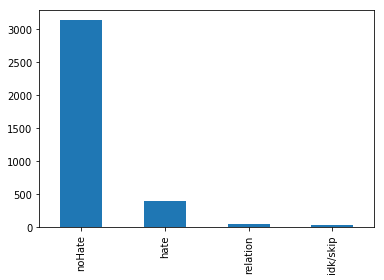

In [25]:
stormfront_sample['label'].value_counts().plot(kind='bar')

0.49743589743589745


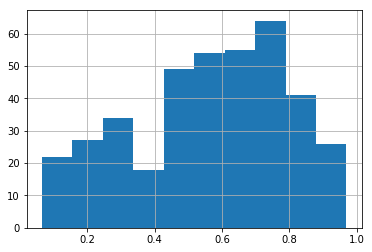

In [35]:
#stormfront hate Histogram
stormfront_hate = stormfront_sample.loc[stormfront_sample["label"] == "hate"]
stormfront_hate['scores'].hist(bins = 10)
print(len(stormfront_hate.loc[stormfront_hate['scores'] > 0.6])/len(stormfront_hate))


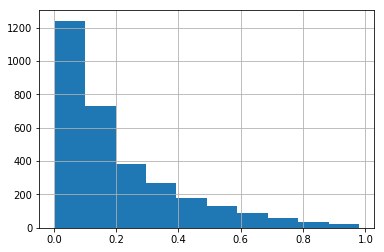

In [34]:
#stormfront noHate Histogram
stormfront_noHate = stormfront_sample.loc[stormfront_sample["label"] == "noHate"]
stormfront_noHate['scores'].hist(bins = 10)
#print(len(stormfront_noHate.loc[stormfront_noHate['scores'] > 0.6])/len(stormfront_noHate))


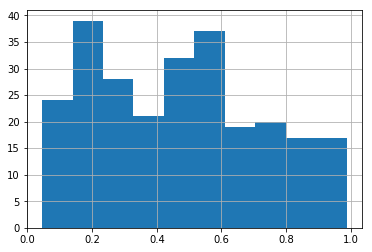

In [36]:
#twitter hate histogram
twitter_sample.loc[twitter_sample["label"] == 1]['score'].hist(bins = 10)

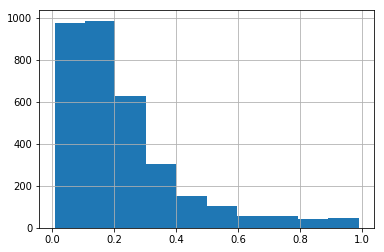

In [37]:
#twitter noHate histogram
twitter_sample.loc[twitter_sample["label"] == 0]['score'].hist(bins = 10)